In [2]:
import os
import shutil
import random

base_path = r"D:\Anaconda\Projects\BrainTumorClassification"
original_dataset = os.path.join(base_path, "BrainTumor Dataset", "brain_tumor_dataset")

train_path = os.path.join(base_path, "dataset", "train")
val_path = os.path.join(base_path, "dataset", "val")

classes = ["yes", "no"]

for cls in classes:
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(val_path, cls), exist_ok=True)

    images = os.listdir(os.path.join(original_dataset, cls))
    random.shuffle(images)

    split_index = int(0.8 * len(images))  # 80% train, 20% val

    train_images = images[:split_index]
    val_images = images[split_index:]

    for img in train_images:
        shutil.copy(
            os.path.join(original_dataset, cls, img),
            os.path.join(train_path, cls, img)
        )

    for img in val_images:
        shutil.copy(
            os.path.join(original_dataset, cls, img),
            os.path.join(val_path, cls, img)
        )

print("Dataset split completed successfully ")

Dataset split completed successfully 


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [4]:
dataset_path = r"D:\Anaconda\Projects\BrainTumorClassification\dataset"

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_path, "val"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 251 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [6]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False

9406464/9406464 [==============================] - 3s 0us/step


In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

In [8]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10
16/16 [==============================] - 20s 580ms/step - loss: 0.6313 - accuracy: 0.6614 - val_loss: 0.4078 - val_accuracy: 0.7851
Epoch 2/10
16/16 [==============================] - 3s 162ms/step - loss: 0.3612 - accuracy: 0.8327 - val_loss: 0.3742 - val_accuracy: 0.8347
Epoch 3/10
16/16 [==============================] - 3s 154ms/step - loss: 0.2511 - accuracy: 0.9004 - val_loss: 0.2589 - val_accuracy: 0.8843
Epoch 4/10
16/16 [==============================] - 2s 155ms/step - loss: 0.2210 - accuracy: 0.9243 - val_loss: 0.2029 - val_accuracy: 0.9008
Epoch 5/10
16/16 [==============================] - 3s 157ms/step - loss: 0.2064 - accuracy: 0.9323 - val_loss: 0.2324 - val_accuracy: 0.9008
Epoch 6/10
16/16 [==============================] - 3s 155ms/step - loss: 0.2005 - accuracy: 0.9203 - val_loss: 0.1996 - val_accuracy: 0.9256
Epoch 7/10
16/16 [==============================] - 2s 155ms/step - loss: 0.2119 - accuracy: 0.9124 - val_loss: 0.1336 - val_accuracy: 0.9504
Epoch

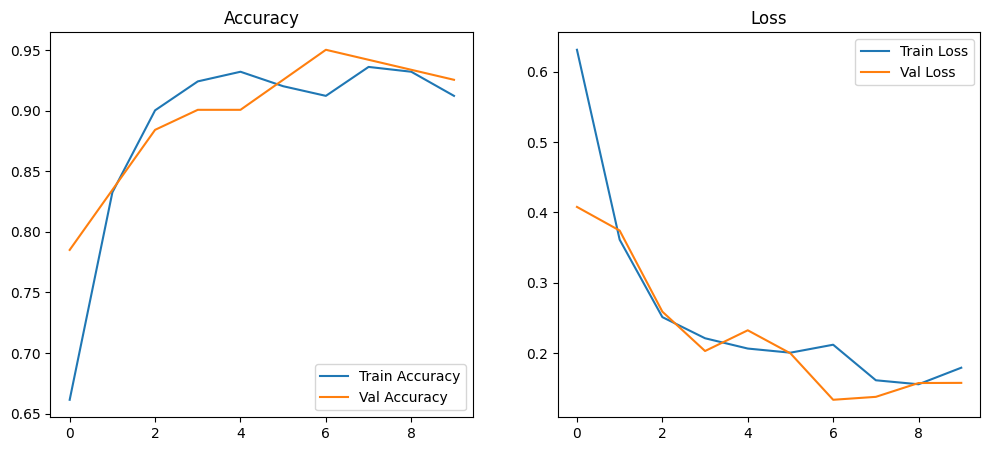

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [11]:
model.save(r"D:\Anaconda\Projects\BrainTumorClassification\brain_tumor_model.h5")

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Tumor Detected")
else:
    print("No Tumor Detected")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Anaconda\\Projects\\BrainTumorClassification\\test.jpg'